In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

04/11/2019 15:54:39 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
04/11/2019 15:54:41 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
04/11/2019 15:54:43 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
04/11/2019 15:54:45 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

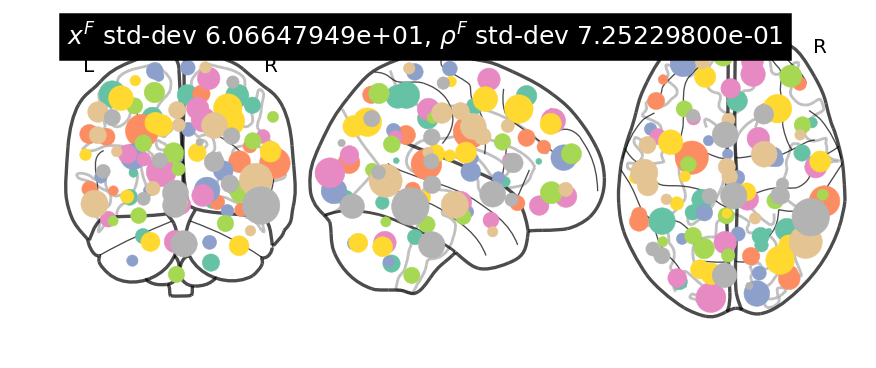

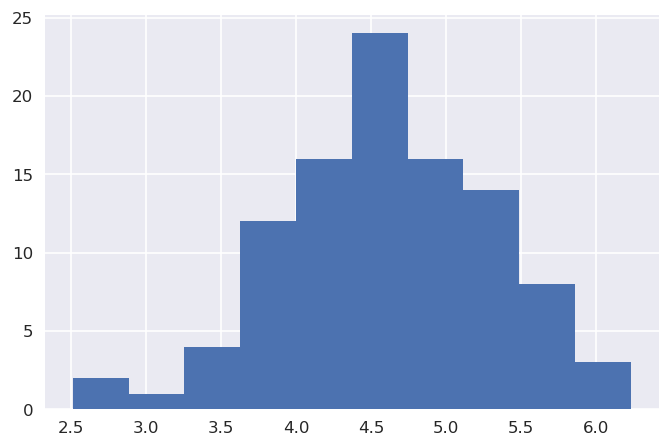

(<nilearn.plotting.displays.OrthoProjector at 0x7efebcfb04e0>,
 tensor([[-31.9816, -84.8251,  -9.4813],
         [ 51.7086,  15.6383,   0.9177],
         [ -1.3026,  37.0437,  13.7769],
         [-17.6837, -32.9740,  40.8516],
         [ 19.2852, -55.9269, -50.7244],
         [ 35.8545, -52.1140,  54.6319],
         [-23.6252, -41.0521, -33.9846],
         [  4.4228,  29.3209,  55.1856],
         [-29.6312,  -6.7183,   5.9923],
         [ 24.4330, -52.9319,  14.2574],
         [ 19.7989, -61.7258, -12.2029],
         [ 45.4097,  -3.5109,  48.5669],
         [-42.9799, -46.5563,  55.6287],
         [ 13.1969, -68.6771,  55.8486],
         [-24.2006,  -6.4719,  32.4088],
         [-42.3038,  42.8269,  -5.3121],
         [ 21.3544,  58.3266,  15.2375],
         [ 37.3148, -82.8116,  12.9698],
         [ 43.9015,  40.2474,  22.8474],
         [-57.3435, -42.6177,  -4.1759],
         [ 23.1426,  23.4858, -12.5619],
         [-46.7094,  29.2739,  28.6500],
         [ 38.4357, -79.0563, -17.3

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
losses = dtfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=4, use_cuda=True, checkpoint_steps=100, blocks_batch_size=2, patience=100)

04/11/2019 16:02:31 [Epoch 1] (96675ms) Posterior free-energy 4.38703872e+08 = KL from prior 1.02069730e+07 - log-likelihood -4.28496736e+08
04/11/2019 16:02:31 Saving checkpoint...
04/11/2019 16:04:05 [Epoch 2] (94237ms) Posterior free-energy 3.92467328e+08 = KL from prior 3.64189875e+05 - log-likelihood -3.92103168e+08
04/11/2019 16:05:39 [Epoch 3] (93940ms) Posterior free-energy 3.86184992e+08 = KL from prior 2.57802203e+05 - log-likelihood -3.85927200e+08
04/11/2019 16:07:14 [Epoch 4] (94292ms) Posterior free-energy 3.83602784e+08 = KL from prior 2.13137047e+05 - log-likelihood -3.83389568e+08
04/11/2019 16:08:48 [Epoch 5] (94318ms) Posterior free-energy 3.82212224e+08 = KL from prior 1.92566172e+05 - log-likelihood -3.82019680e+08
04/11/2019 16:10:22 [Epoch 6] (94147ms) Posterior free-energy 3.81239808e+08 = KL from prior 1.83750359e+05 - log-likelihood -3.81056128e+08
04/11/2019 16:11:58 [Epoch 7] (96045ms) Posterior free-energy 3.80439520e+08 = KL from prior 1.81017828e+05 - log

Epoch   961: reducing learning rate of group 0 to 5.0000e-03.
Epoch   961: reducing learning rate of group 1 to 5.0000e-04.


04/12/2019 17:09:59 [Epoch 963] (93705ms) Posterior free-energy 2.90929504e+08 = KL from prior 1.39147025e+06 - log-likelihood -2.89538048e+08
04/12/2019 17:11:33 [Epoch 964] (93614ms) Posterior free-energy 2.89956768e+08 = KL from prior 1.37530588e+06 - log-likelihood -2.88581536e+08
04/12/2019 17:13:06 [Epoch 965] (93431ms) Posterior free-energy 2.89774880e+08 = KL from prior 1.37899538e+06 - log-likelihood -2.88395744e+08
04/12/2019 17:14:40 [Epoch 966] (93591ms) Posterior free-energy 2.89704096e+08 = KL from prior 1.37736788e+06 - log-likelihood -2.88326688e+08
04/12/2019 17:16:14 [Epoch 967] (93750ms) Posterior free-energy 2.89680960e+08 = KL from prior 1.38186212e+06 - log-likelihood -2.88299168e+08
04/12/2019 17:17:47 [Epoch 968] (93566ms) Posterior free-energy 2.89659584e+08 = KL from prior 1.37615300e+06 - log-likelihood -2.88283296e+08
04/12/2019 17:19:21 [Epoch 969] (93587ms) Posterior free-energy 2.89659392e+08 = KL from prior 1.38163525e+06 - log-likelihood -2.88277856e+08

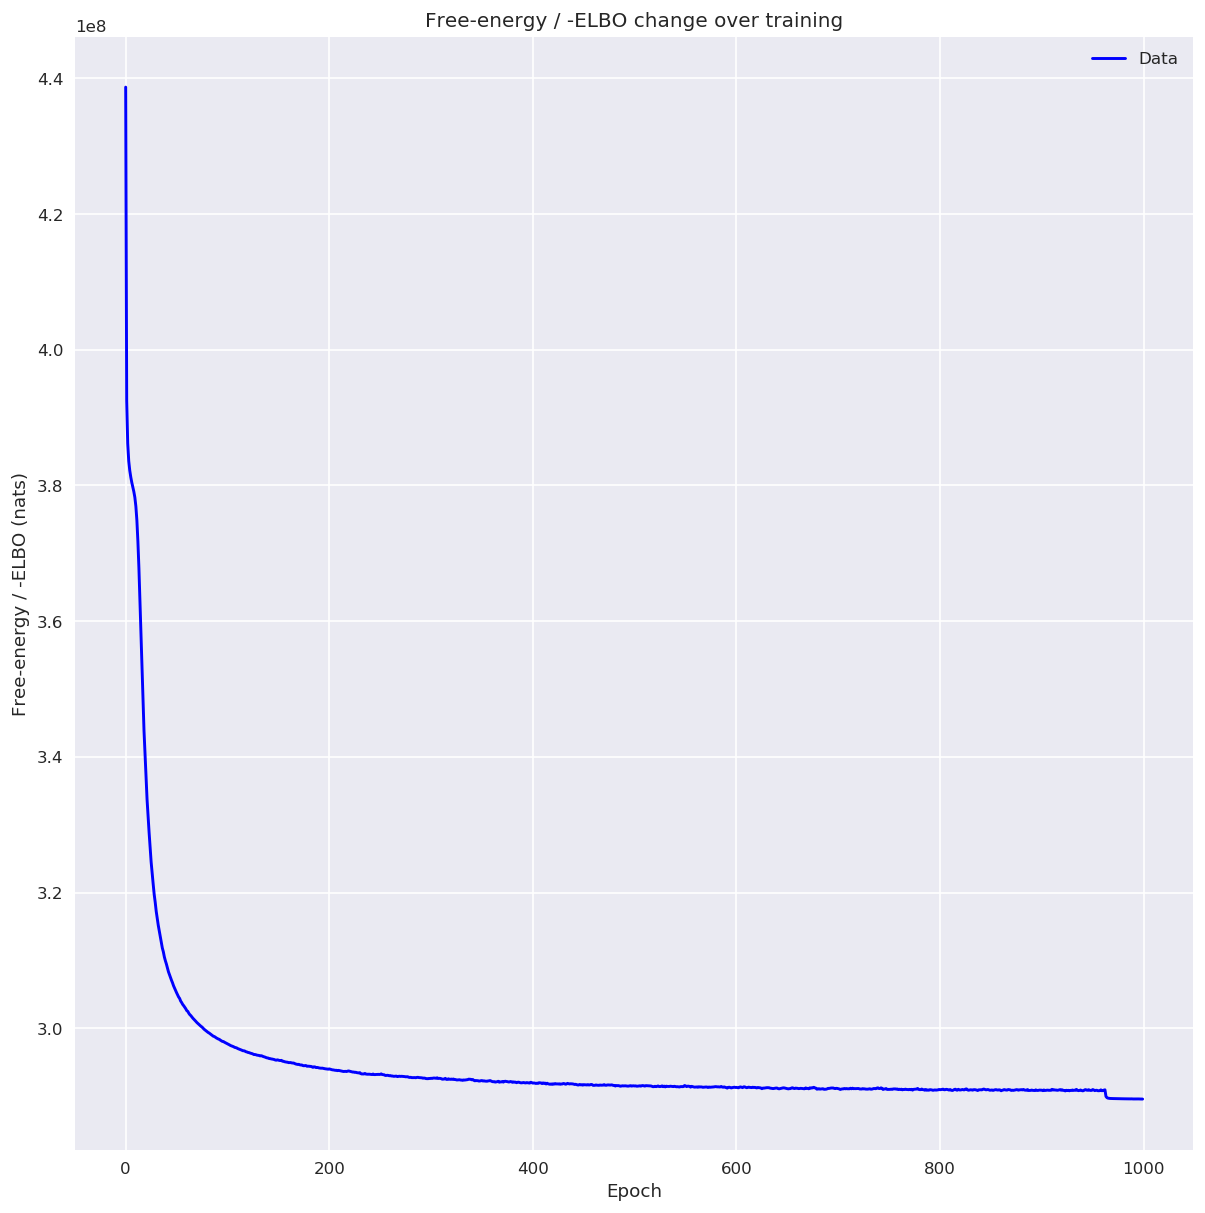

In [8]:
utils.plot_losses(losses)

In [9]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [10]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [11]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

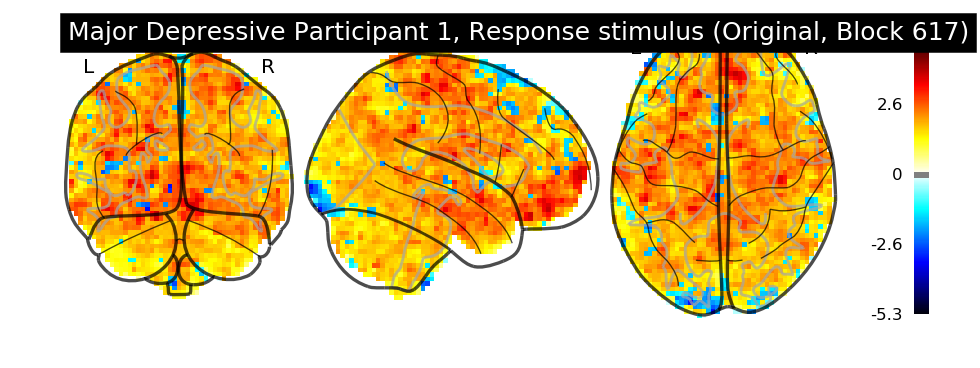

04/12/2019 18:08:54 Reconstruction Error (Frobenius Norm): 1.87871750e+02 out of 3.02421997e+02


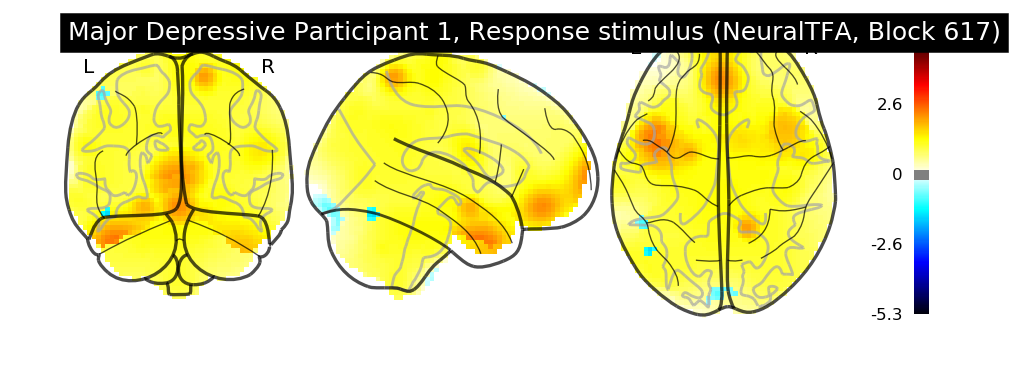

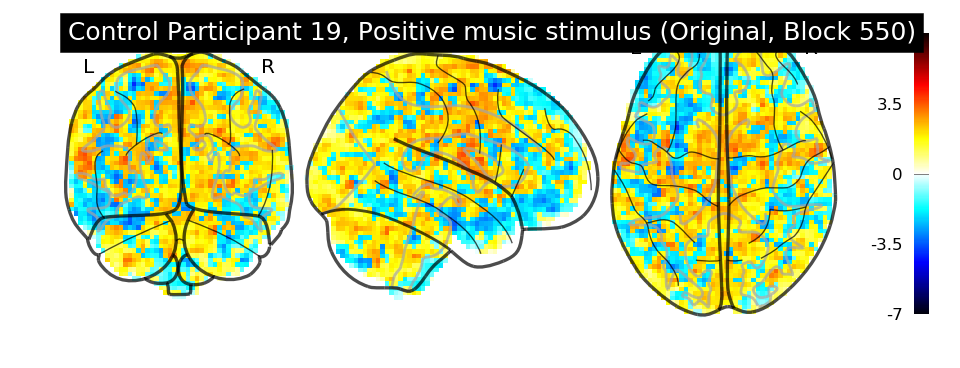

04/12/2019 18:08:57 Reconstruction Error (Frobenius Norm): 7.22299377e+02 out of 8.08932922e+02


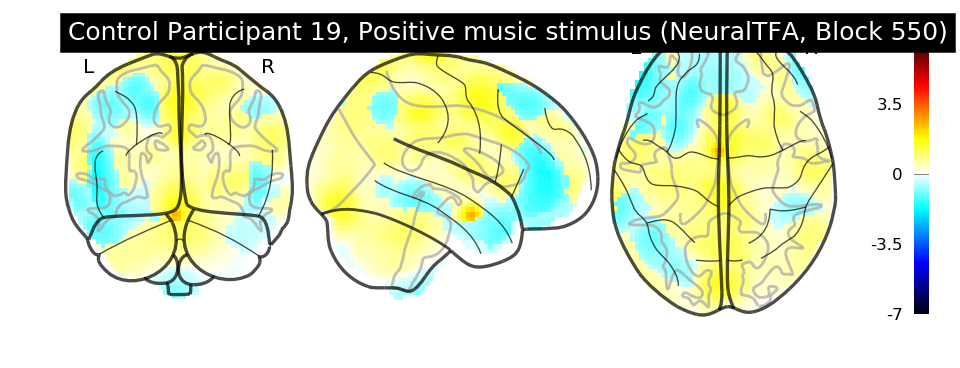

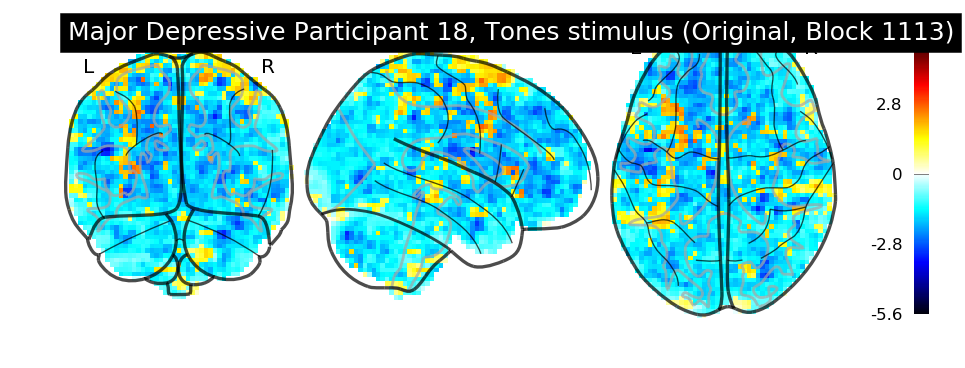

04/12/2019 18:09:01 Reconstruction Error (Frobenius Norm): 5.59283936e+02 out of 7.15007019e+02


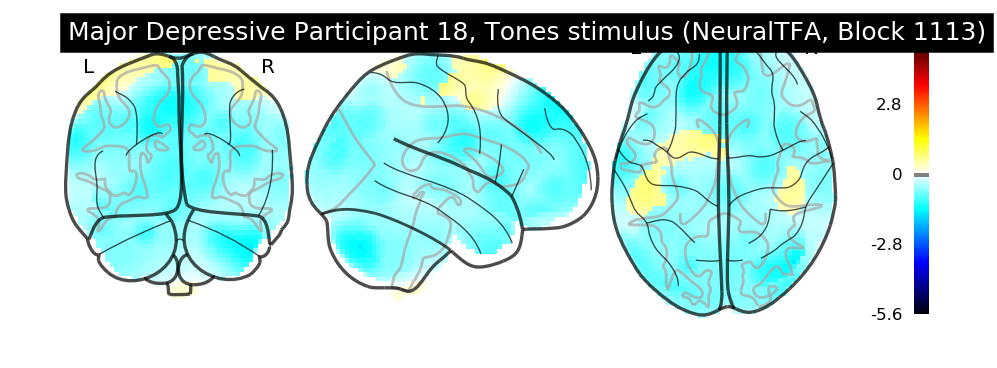

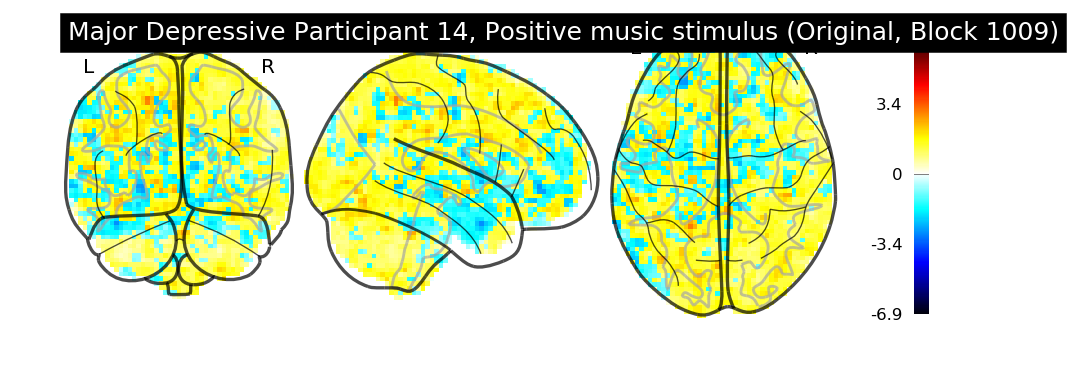

04/12/2019 18:09:05 Reconstruction Error (Frobenius Norm): 5.38207214e+02 out of 6.61261597e+02


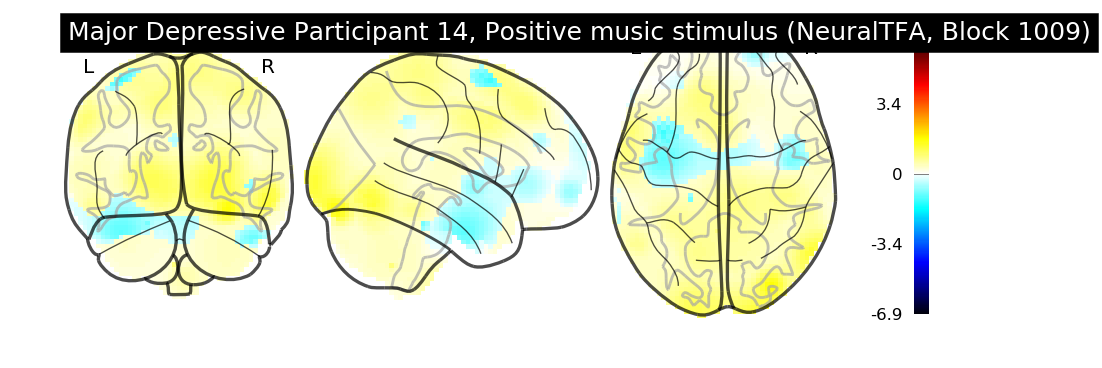

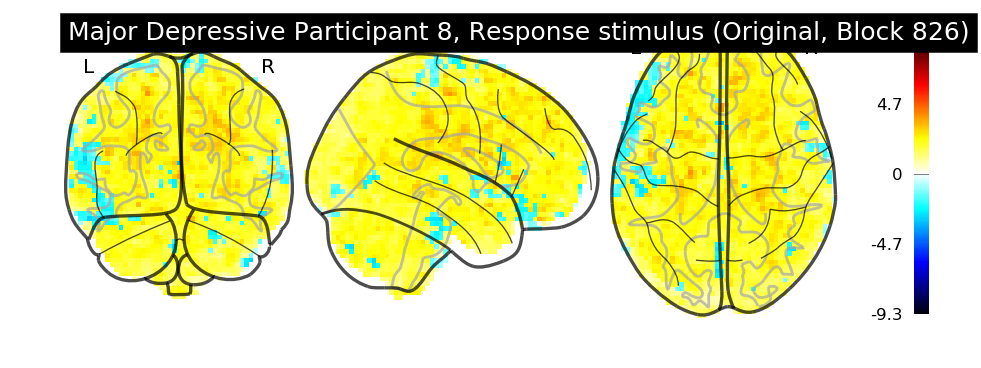

04/12/2019 18:09:07 Reconstruction Error (Frobenius Norm): 1.92717850e+02 out of 2.98235962e+02


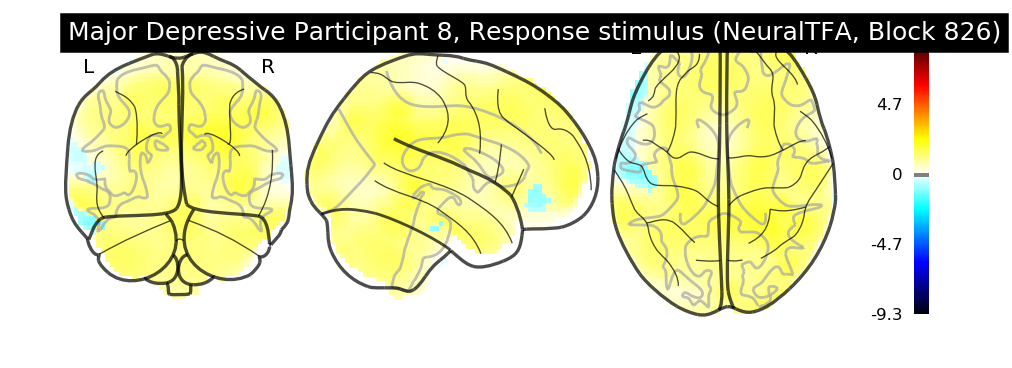

In [12]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


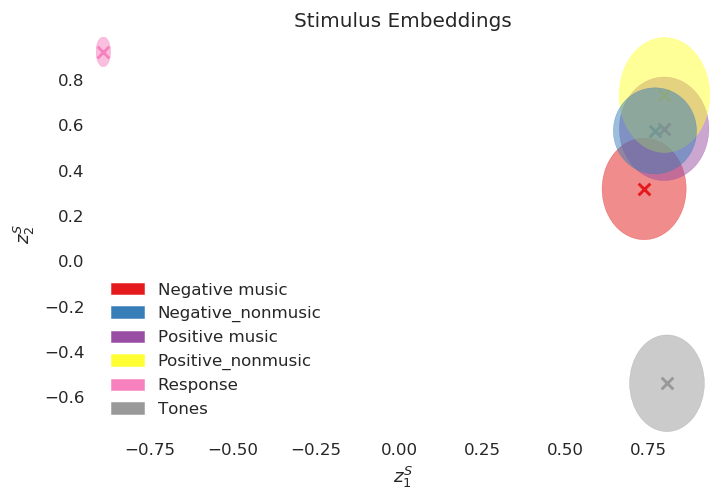

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


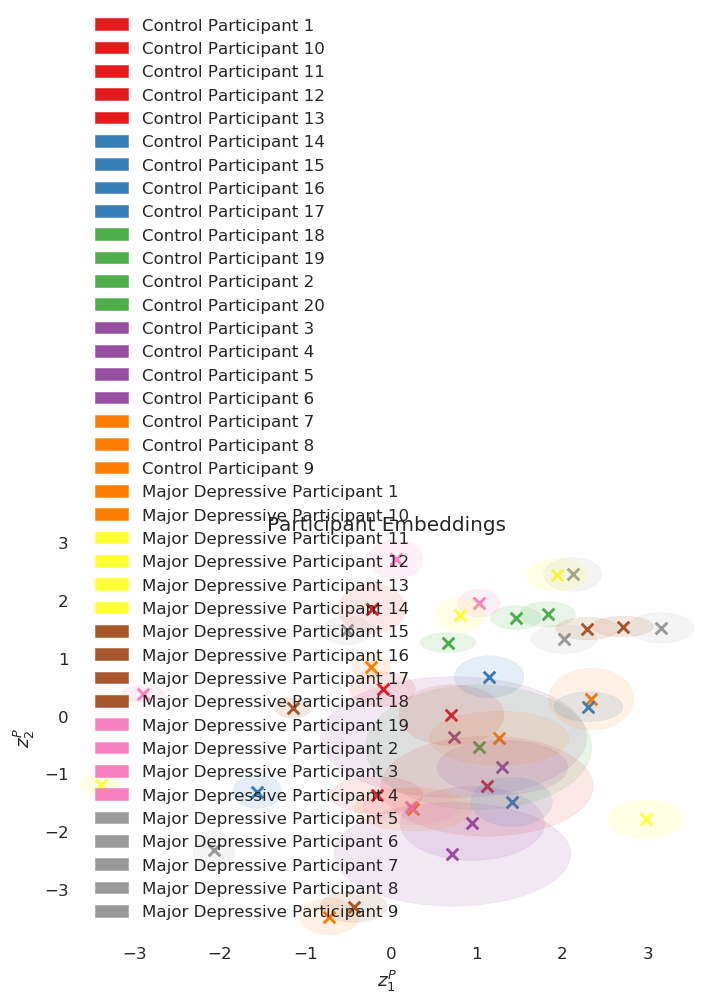

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

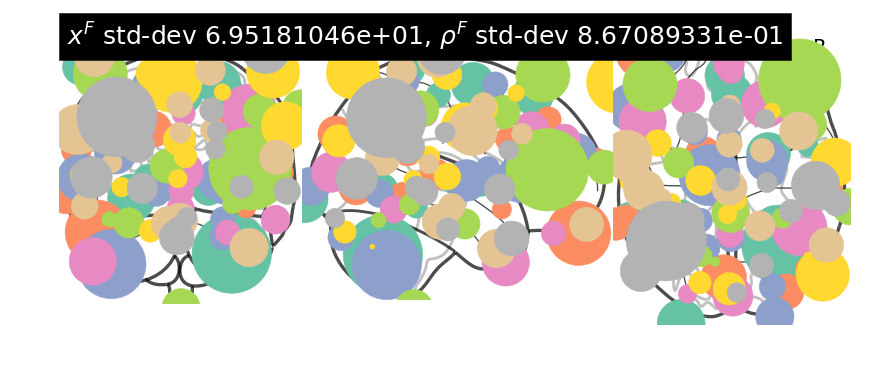

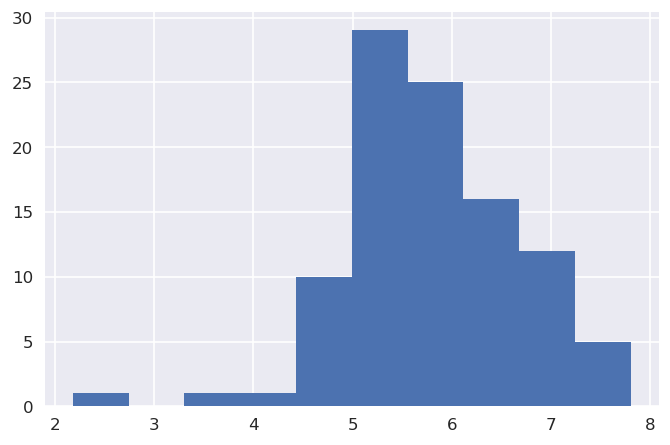

(<nilearn.plotting.displays.OrthoProjector at 0x7efeaf1e1080>,
 tensor([[-3.0900e+01, -1.1108e+02, -9.8875e+00],
         [ 4.9135e+01,  8.0514e-01, -1.7568e+00],
         [-3.4341e+00,  4.5471e+01,  4.5509e-02],
         [ 9.2150e-02, -2.6396e+01,  5.5670e+01],
         [ 3.2392e+01, -6.1369e+01, -4.5037e+01],
         [ 3.0967e+01, -5.5927e+01,  5.8792e+01],
         [-2.9918e+01, -4.0232e+01, -1.4955e+01],
         [ 1.1855e+00,  3.3494e+01,  5.5935e+01],
         [-2.0394e+01, -1.5918e+01,  2.1373e+00],
         [ 2.6538e+01, -4.4421e+01,  2.2760e+01],
         [ 1.7698e+01, -6.2055e+01, -4.2701e+00],
         [ 2.4159e+01, -4.4434e+00,  6.2432e+01],
         [-6.3124e+01, -4.5929e+01,  7.2773e+01],
         [-4.0243e+00, -8.2211e+01,  7.0516e+01],
         [-1.6996e+01, -4.4046e+00,  3.3542e+01],
         [-5.2470e+01,  6.2206e+01, -3.1568e+01],
         [ 2.8572e+01,  7.3247e+01,  1.4753e+01],
         [ 3.5360e+01, -9.1150e+01,  3.1152e+01],
         [ 3.2437e+01,  4.2943e+01,  

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

04/12/2019 18:11:20 Average reconstruction error (MSE): 6.67485033e-01
04/12/2019 18:11:20 Average data norm (Euclidean): 9.63051352e-01
04/12/2019 18:11:20 Percent average reconstruction error: 0.271390


(0.6674850326904267, 0.9630513517336236, 0.002713900286103827)

In [17]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


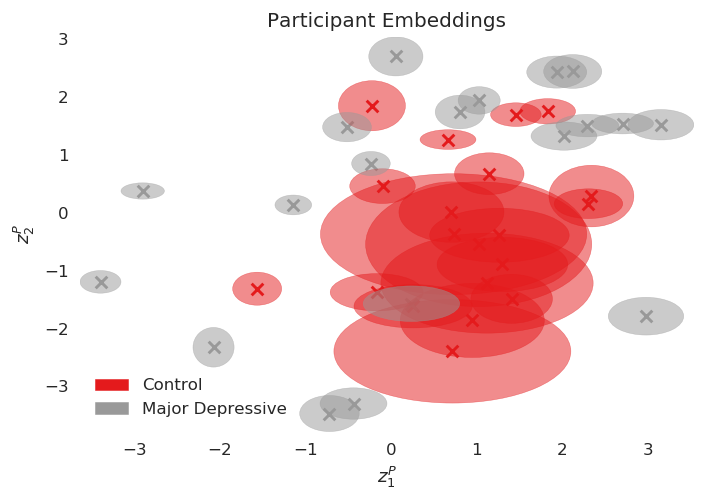

In [18]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)